In [7]:
import pandas as pd
data = pd.read_csv(r'../data/spi_vci_daily.csv').iloc[:, 1:]

/tmp/ipykernel_993686/73208286.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for idx, df in data.drop(columns={'precp_idx','land_cat','time'}).groupby(['product']):


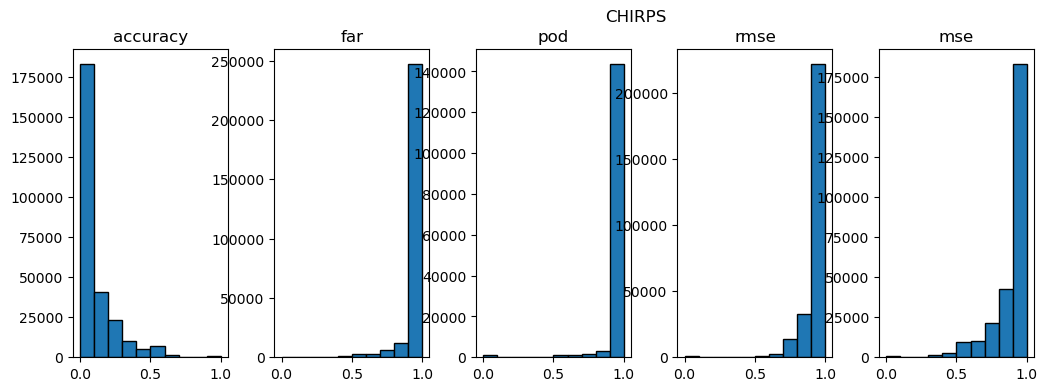

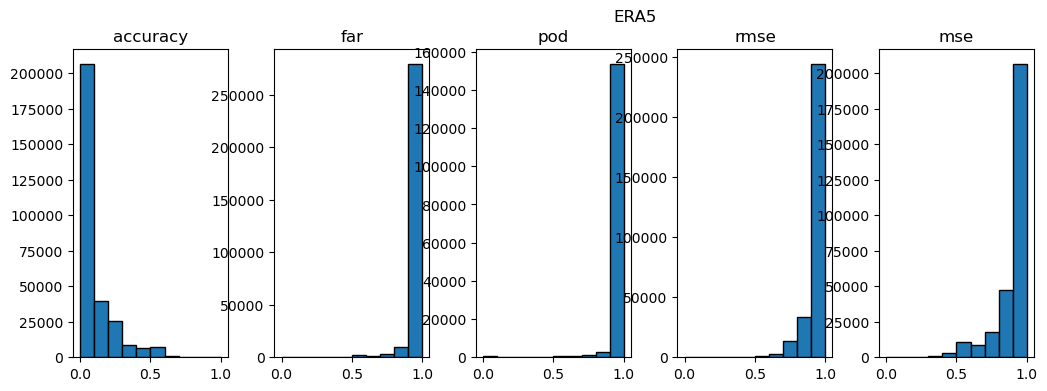

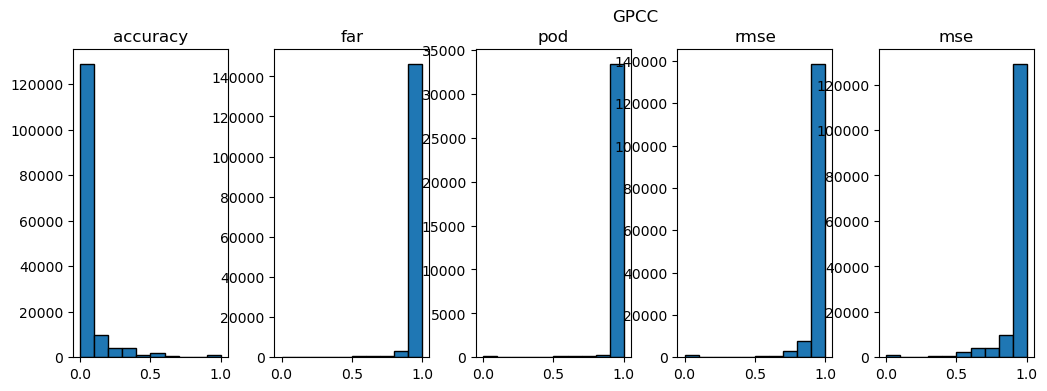

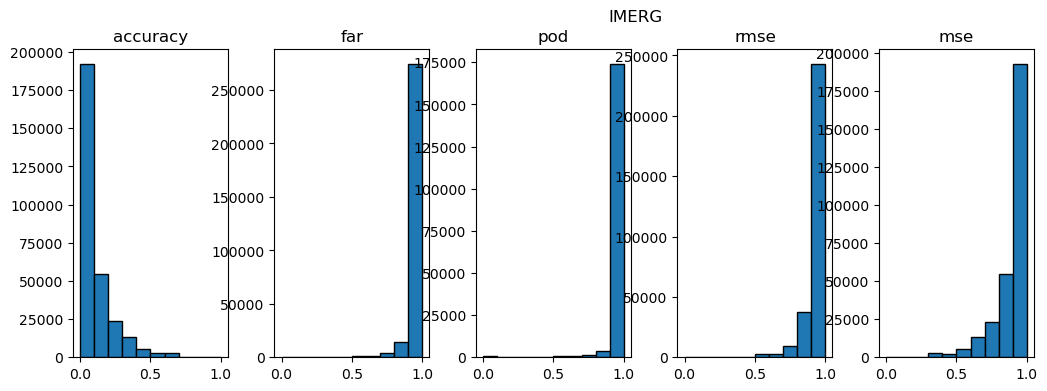

In [8]:
for idx, df in data.drop(columns={'precp_idx','land_cat','time'}).groupby(['product']):
        # plot a hist for each column
    axes = df.hist(layout=(1, 6), figsize=(15, 4), ec='k', grid=False)

    #df.plot(layout=(1, 6), kind='kde', ax=axes, secondary_y=True)

    # extract the figure object from the array of axes
    fig = axes[0][0].get_figure()

    # add the gender as the title
    fig.suptitle(idx)

In [9]:
sub_df = data.loc[data['precp_idx']=="spi_gamma_30"]

In [10]:
import seaborn as sns
df = sub_df.groupby(['description','product']).mean()[['far','pod','accuracy']]
df.style.background_gradient(cmap='Blues')


/tmp/ipykernel_993686/3295850026.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = sub_df.groupby(['description','product']).mean()[['far','pod','accuracy']]


<Figure size 640x480 with 0 Axes>

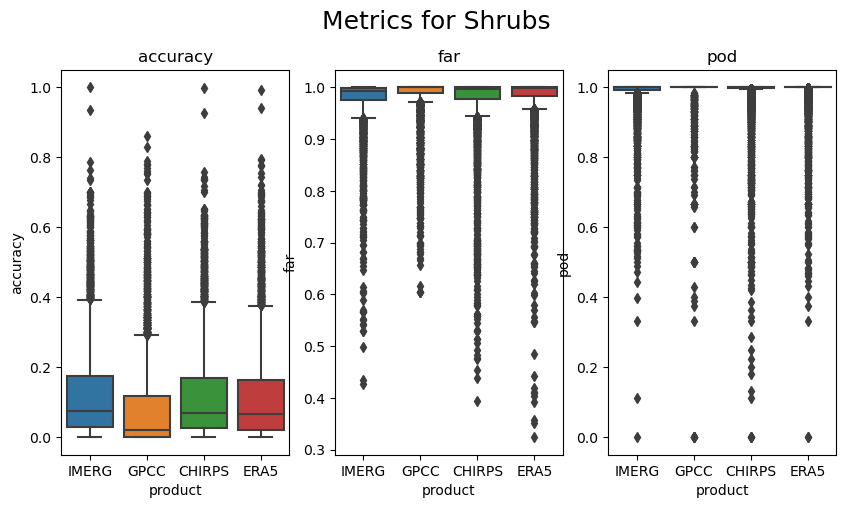

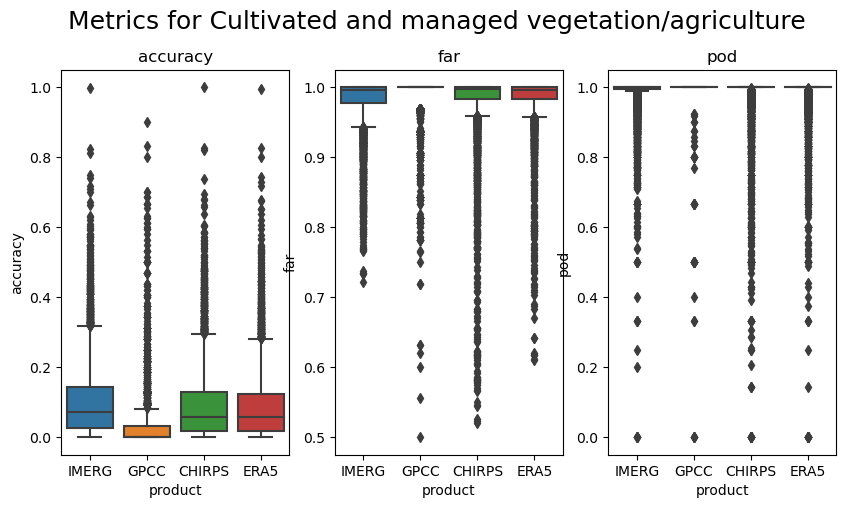

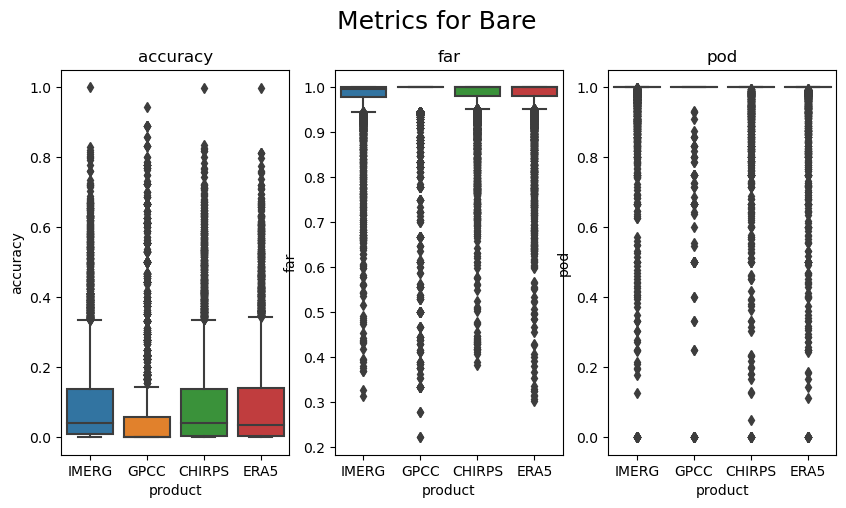

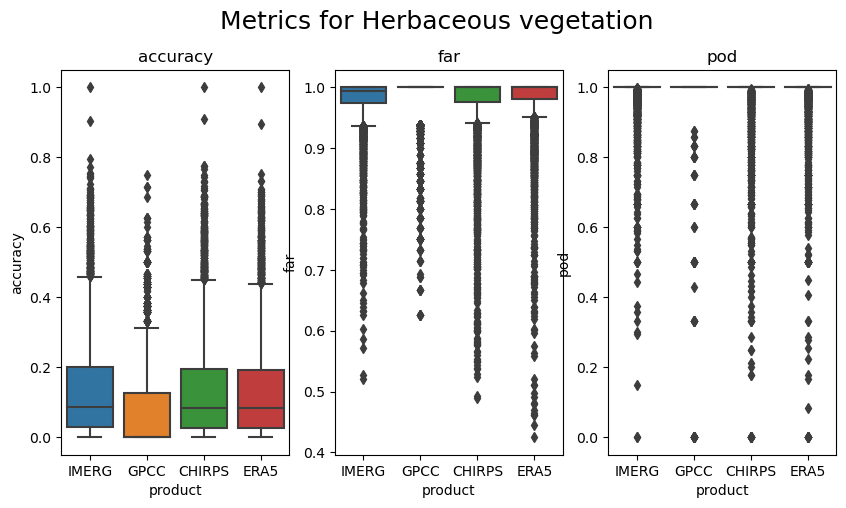

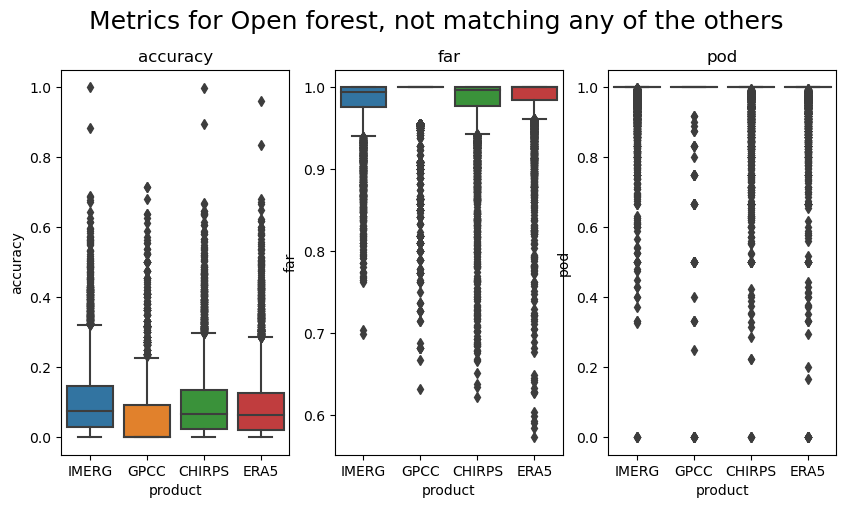

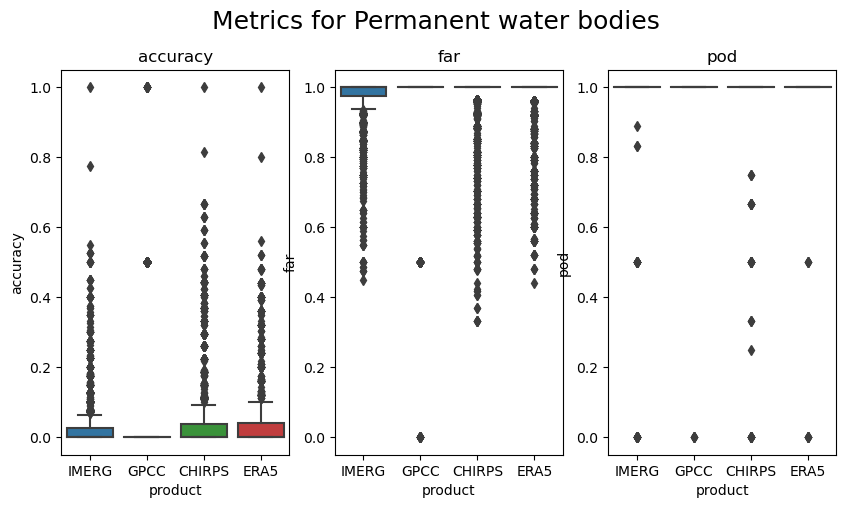

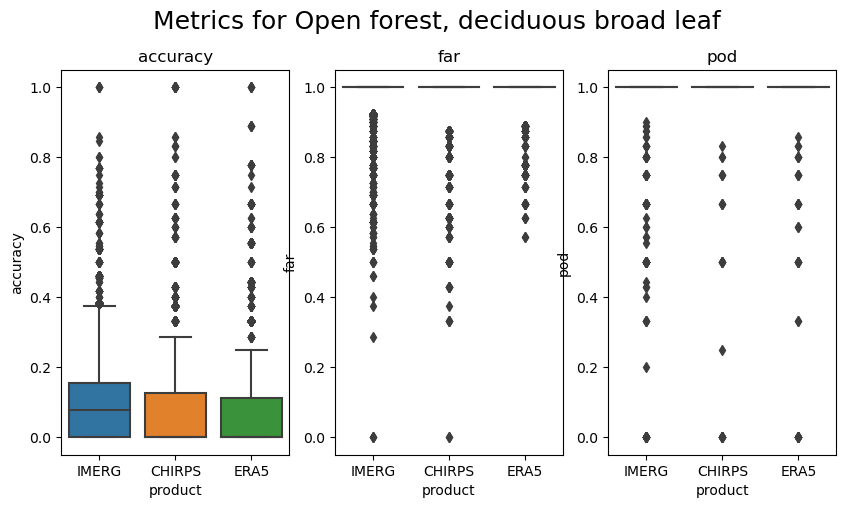

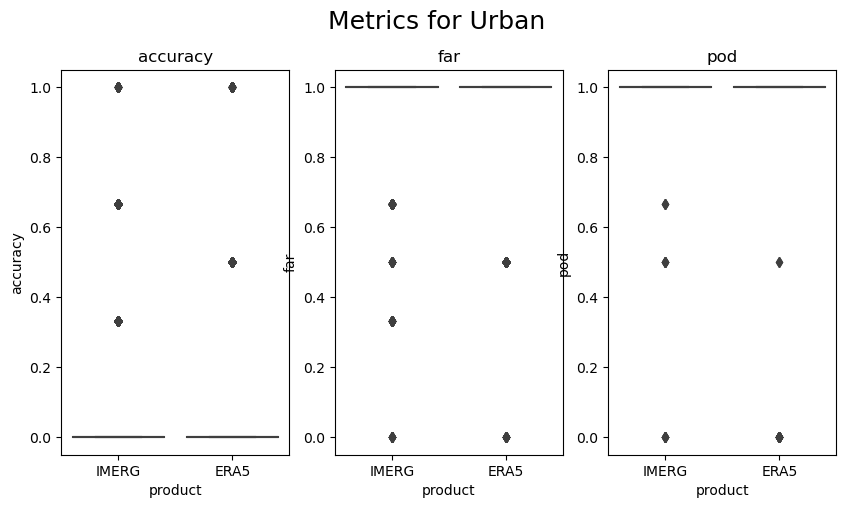

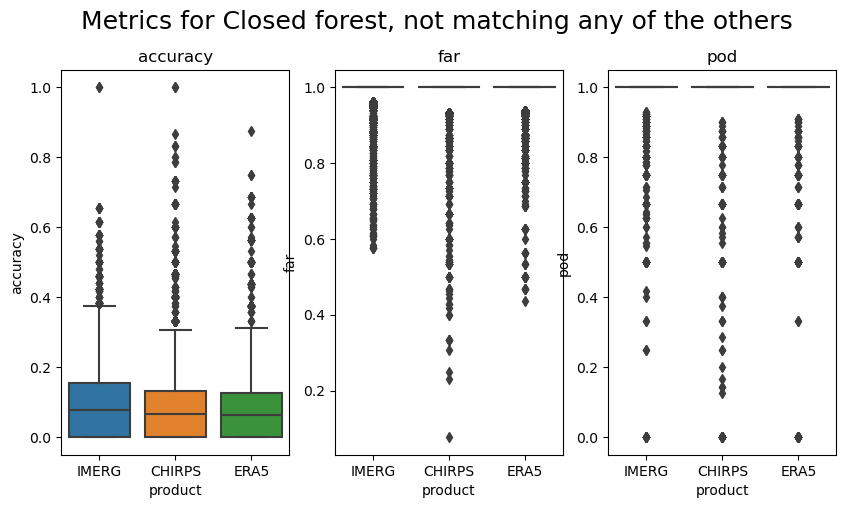

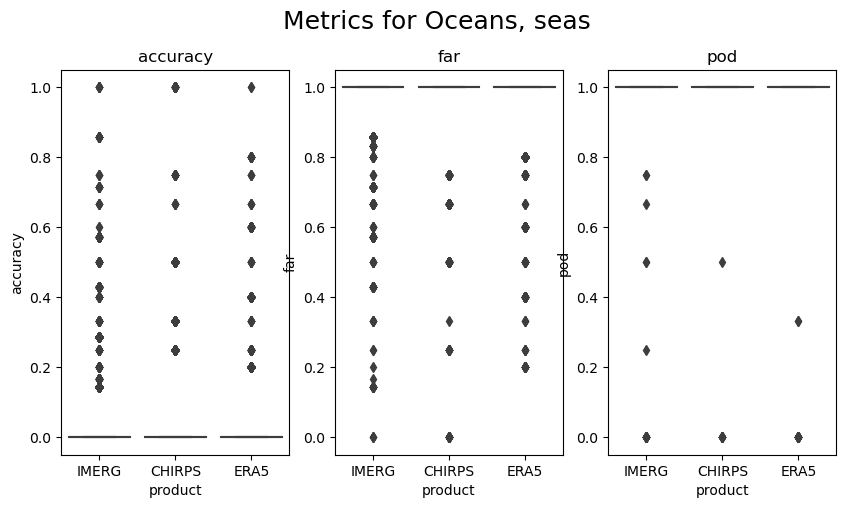

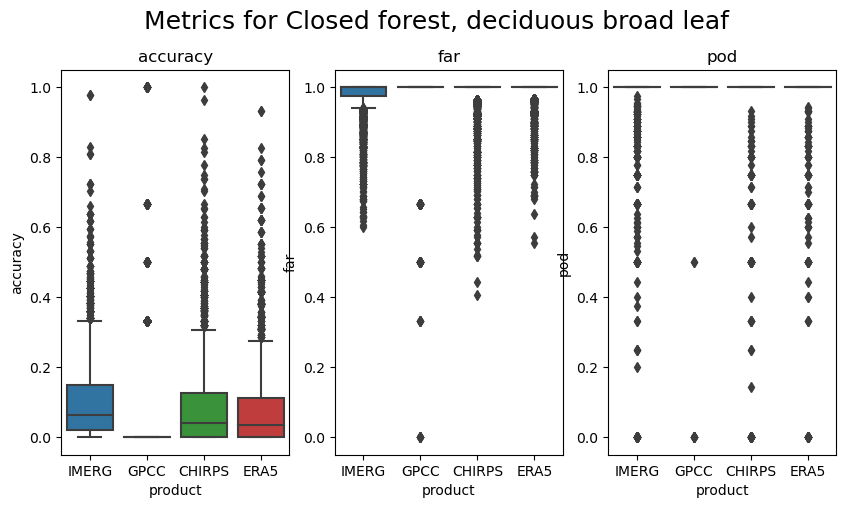

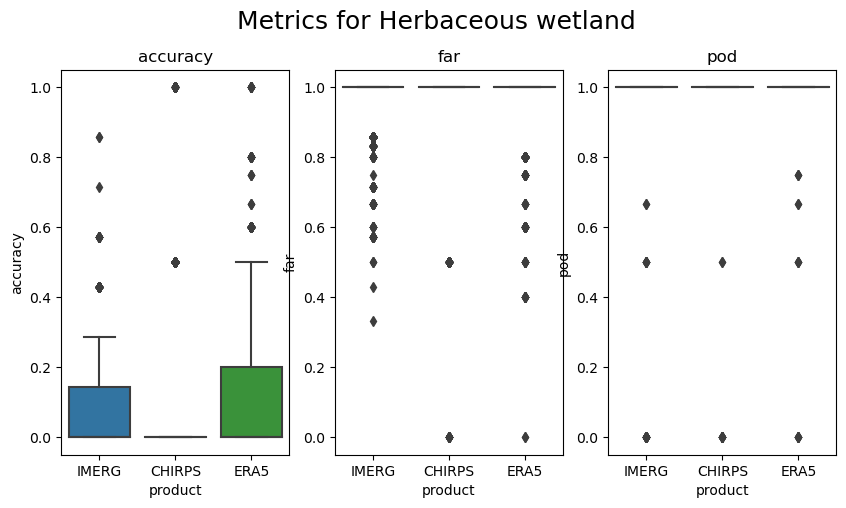

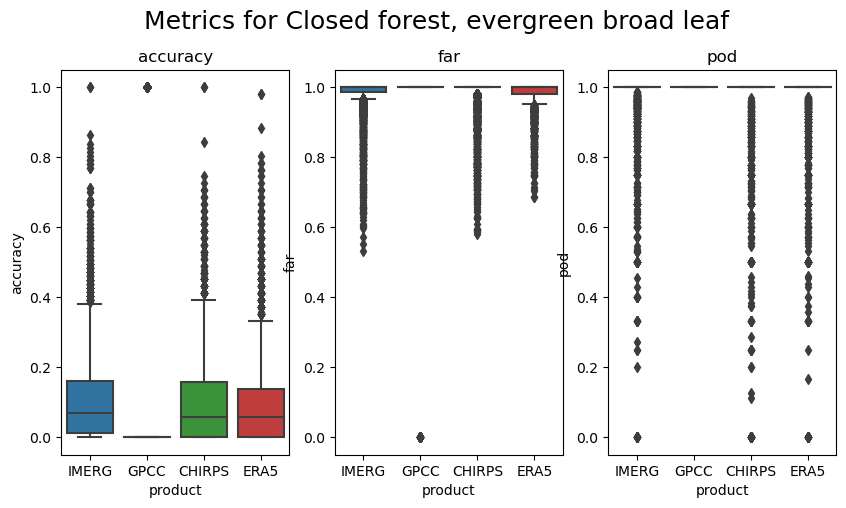

In [13]:
import matplotlib.pyplot as plt

plt.subplots_adjust(wspace=0.8)
plt.subplots_adjust(hspace=0.5)

metrics = ["accuracy","far","pod"]

#countries = ['Kenya','Ethiopia','Somalia']
for i, soil in enumerate(sub_df["description"].unique()):
    #for metric in ['accuracy']:
    fig, axes = plt.subplots(1, 3, figsize=(10,5))
    for metric, ax in zip(metrics, axes.ravel()):
        plt.suptitle(f"Metrics for {soil}", fontsize=18, y=1)
        new_df = sub_df.loc[(sub_df["description"]==soil)].dropna(subset=[metric])
        if len(new_df)>0:
            sns.boxplot(data = new_df, y=metric, x='product', ax=ax)
        ax.set_title(f"{metric}")
    plt.show()